In [1]:
'''
代码描述
项目概述
这是一个用于分析和可视化RSV（呼吸道合胞病毒）前融合F蛋白表达水平的数据分析脚本。通过ELISA实验数据，评估不同UTR构建体相对于m002基准的表达倍数变化（fold change）。
主要功能
1. 数据加载

从Excel文件RSV_ELISA_P1-P4.xlsx加载ELISA实验数据
包含原始信号值和相对于m002基准的fold change计算结果

2. 统计可视化（三种图表）
分布直方图：

展示fold change值的分布情况
添加KDE（核密度估计）曲线显示分布趋势
帮助了解整体表达水平分布

排序散点图：

按fold change值从低到高排序所有样本
特殊标注关键样本（m176 UTR用红色，m002基准用绿色）
自动识别并标注高表达样本（fold change > 5）
添加基准线（y=1.0）表示m002水平

条形图：

展示每个样本的fold change值
按表达水平排序便于比较
使用颜色区分特殊样本：

红色：m176 UTR和m801 UTR（重点关注样本）
绿色：m002 UTR（基准样本）


包含基准线便于视觉比较

3. 数据分析输出
特殊样本统计：

输出m176 UTR和m002 UTR的详细数据
包括原始信号值和fold change

高表达样本筛选：

识别fold change > 5的所有样本
输出这些高表达样本的详细信息

4. 图表保存

将最终的条形图保存为高分辨率PNG图片（300 DPI）
保存路径：./RESULT_RSV/distribution.png

分析特点
多维度展示：

从分布、排序、分类三个角度展示数据
便于发现异常值和整体趋势

重点标注：

自动识别和标注关键样本
突出显示高表达构建体

定量比较：

所有数据相对于m002基准进行标准化
便于不同UTR构建体间的直接比较

应用价值
这个分析脚本用于：

评估UTR效果：量化不同UTR对RSV蛋白表达的影响
筛选优势构建体：识别表达水平显著提高的UTR组合
数据质量控制：通过分布图检查数据的合理性
结果展示：生成publication-ready的图表

输出示例解读

m176 UTR和m801 UTR：论文中提到的两个最佳表现UTR
Fold change > 5：表达水平提高5倍以上的优秀候选
分布形态：评估整体实验效果和数据质量
'''

'\n代码描述\n项目概述\n这是一个用于分析和可视化RSV（呼吸道合胞病毒）前融合F蛋白表达水平的数据分析脚本。通过ELISA实验数据，评估不同UTR构建体相对于m002基准的表达倍数变化（fold change）。\n主要功能\n1. 数据加载\n\n从Excel文件RSV_ELISA_P1-P4.xlsx加载ELISA实验数据\n包含原始信号值和相对于m002基准的fold change计算结果\n\n2. 统计可视化（三种图表）\n分布直方图：\n\n展示fold change值的分布情况\n添加KDE（核密度估计）曲线显示分布趋势\n帮助了解整体表达水平分布\n\n排序散点图：\n\n按fold change值从低到高排序所有样本\n特殊标注关键样本（m176 UTR用红色，m002基准用绿色）\n自动识别并标注高表达样本（fold change > 5）\n添加基准线（y=1.0）表示m002水平\n\n条形图：\n\n展示每个样本的fold change值\n按表达水平排序便于比较\n使用颜色区分特殊样本：\n\n红色：m176 UTR和m801 UTR（重点关注样本）\n绿色：m002 UTR（基准样本）\n\n\n包含基准线便于视觉比较\n\n3. 数据分析输出\n特殊样本统计：\n\n输出m176 UTR和m002 UTR的详细数据\n包括原始信号值和fold change\n\n高表达样本筛选：\n\n识别fold change > 5的所有样本\n输出这些高表达样本的详细信息\n\n4. 图表保存\n\n将最终的条形图保存为高分辨率PNG图片（300 DPI）\n保存路径：./RESULT_RSV/distribution.png\n\n分析特点\n多维度展示：\n\n从分布、排序、分类三个角度展示数据\n便于发现异常值和整体趋势\n\n重点标注：\n\n自动识别和标注关键样本\n突出显示高表达构建体\n\n定量比较：\n\n所有数据相对于m002基准进行标准化\n便于不同UTR构建体间的直接比较\n\n应用价值\n这个分析脚本用于：\n\n评估UTR效果：量化不同UTR对RSV蛋白表达的影响\n筛选优势构建体：识别表达水平显著提高的UTR组合\n数据质量控制：通过分布图检查数据的合理性\n结果展示：生成publication-ready的图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_excel('RSV_ELISA_P1-P4.xlsx', sheet_name = 'final')
data

,Unnamed: 0,original signal,fold change to m002 benchmark
0,m176 UTR,1.164125,2.492942
1,A2,0.716050,1.512328
2,A3,0.621275,1.313148
3,A4,0.592650,1.253121
4,A5,0.502250,1.067754
...,...,...,...
91,m801 UTR,4.073500,8.737117
92,H9,0.433350,0.920121
93,H10,0.426800,0.894712
94,H11,0.489650,1.042700


<Figure size 1200x800 with 0 Axes>

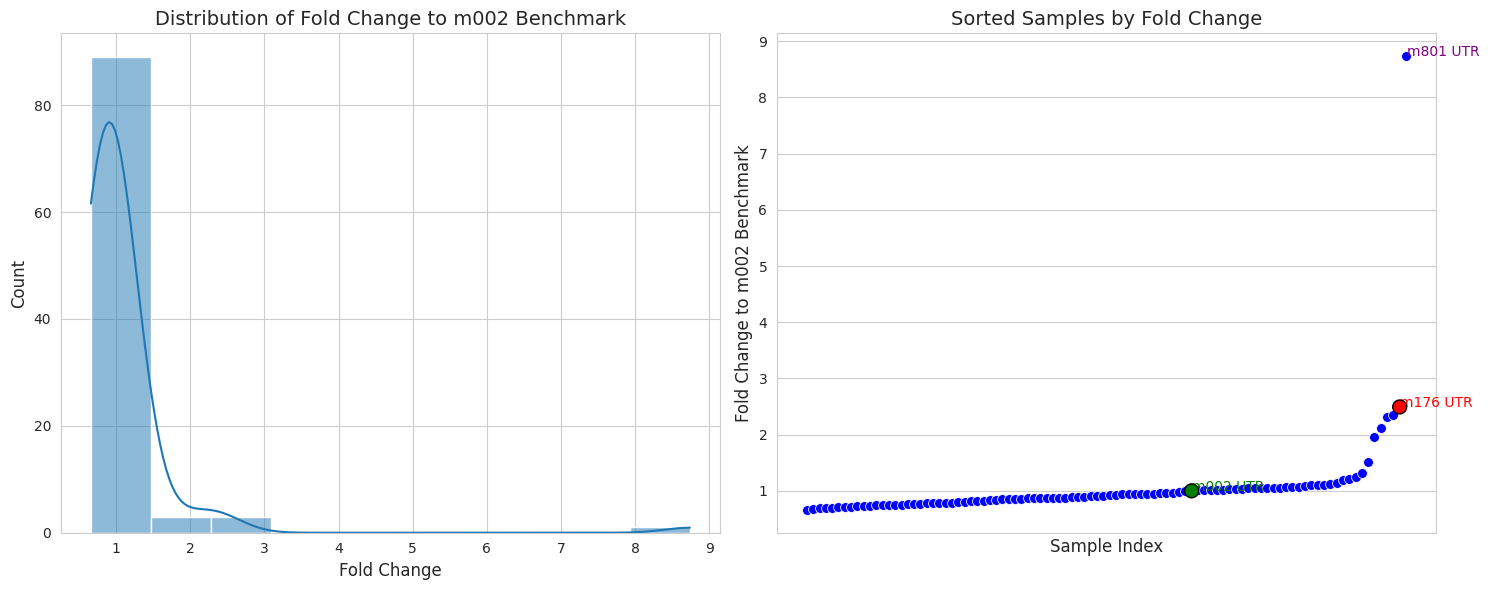

特殊样本:
   Unnamed: 0  original signal  fold change to m002 benchmark
0    m176 UTR         1.164125                       2.492942
47   m002 UTR         0.473500                       1.000000

高fold change样本 (> 5):
   Unnamed: 0  original signal  fold change to m002 benchmark
91   m801 UTR           4.0735                       8.737117


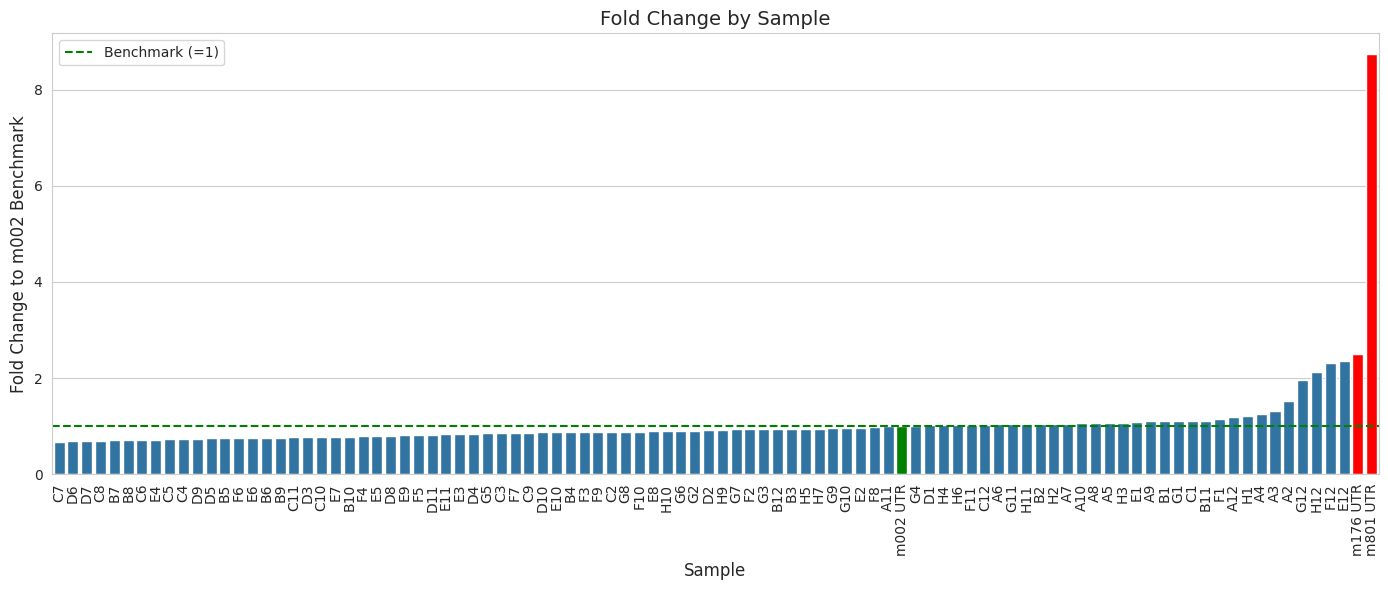

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
data = pd.read_excel('RSV_ELISA_P1-P4.xlsx', sheet_name='final')

# 设置seaborn样式
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. 折叠变化的分布图 (直方图)
sns.histplot(data['fold change to m002 benchmark'], bins=10, kde=True, ax=ax1)
ax1.set_title('Distribution of Fold Change to m002 Benchmark', fontsize=14)
ax1.set_xlabel('Fold Change', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# 找出特殊样本的索引
m176_idx = data[data['Unnamed: 0'] == 'm176 UTR'].index
# 假设m002 UTR可能不在数据中显示，如果有的话我们也标注它
m002_idx = data[data['Unnamed: 0'] == 'm002 UTR'].index

# 2. 散点图，按照fold change排序
# 复制数据并排序
sorted_data = data.copy().sort_values('fold change to m002 benchmark')
# 重置索引以便绘图
sorted_data = sorted_data.reset_index(drop=True)

# 绘制散点图
sns.scatterplot(
    x=range(len(sorted_data)),
    y=sorted_data['fold change to m002 benchmark'],
    s=50,  # 点的大小
    color='blue',
    ax=ax2
)

# 标注特殊样本
special_samples = []
colors = []

# 标注m176 UTR
for i, row in sorted_data.iterrows():
    if row['Unnamed: 0'] == 'm176 UTR':
        special_samples.append((i, row['fold change to m002 benchmark']))
        colors.append('red')
        ax2.text(i+0.1, row['fold change to m002 benchmark'], 'm176 UTR', 
                fontsize=10, color='red')
    
    # 如果找到m002 UTR，也标注它
    if row['Unnamed: 0'] == 'm002 UTR':
        special_samples.append((i, row['fold change to m002 benchmark']))
        colors.append('green')
        ax2.text(i+0.1, row['fold change to m002 benchmark'], 'm002 UTR', 
                fontsize=10, color='green')

# 如果数据中没有m002 UTR，我们添加一个m002的基准线
if len(m002_idx) == 0:
    ax2.axhline(y=1.0, color='green', linestyle='--', label='m002 UTR (benchmark)')
    ax2.legend()

# 如果有特殊样本，重新绘制这些点以突出显示
if special_samples:
    special_x, special_y = zip(*special_samples)
    ax2.scatter(special_x, special_y, s=100, c=colors, edgecolor='black', zorder=5)

ax2.set_title('Sorted Samples by Fold Change', fontsize=14)
ax2.set_xlabel('Sample Index', fontsize=12)
ax2.set_ylabel('Fold Change to m002 Benchmark', fontsize=12)
ax2.set_xticks([])  # 移除x轴刻度，因为这只是排序后的索引

# 调整布局
plt.tight_layout()

# 标识特别高的fold change样本
high_fold_change = sorted_data[sorted_data['fold change to m002 benchmark'] > 5]
if not high_fold_change.empty:
    for i, row in high_fold_change.iterrows():
        sample_idx = sorted_data.index[sorted_data['Unnamed: 0'] == row['Unnamed: 0']].tolist()[0]
        ax2.text(sample_idx+0.1, row['fold change to m002 benchmark'], 
                row['Unnamed: 0'], fontsize=10, color='purple')

# 显示图表
plt.show()

# 额外创建一个条形图，按样本名称显示fold change
plt.figure(figsize=(14, 6))
sample_order = data.sort_values('fold change to m002 benchmark')['Unnamed: 0']

# 创建条形图，按fold change值排序
bar_plot = sns.barplot(x='Unnamed: 0', y='fold change to m002 benchmark', 
                        data=data.sort_values('fold change to m002 benchmark'),
                        order=sample_order)

# 为特殊样本设置不同颜色
for i, sample in enumerate(sample_order):
    if sample == 'm176 UTR' or sample == 'm801 UTR' :
        bar_plot.patches[i].set_facecolor('red')
    elif sample == 'm002 UTR':
        bar_plot.patches[i].set_facecolor('green')

# 添加标题和标签
plt.title('Fold Change by Sample', fontsize=14)
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Fold Change to m002 Benchmark', fontsize=12)
plt.xticks(rotation=90)  # 旋转x轴标签以防重叠
plt.axhline(y=1.0, color='green', linestyle='--', label='Benchmark (=1)')
plt.legend()

# 调整布局
plt.tight_layout()
plt.savefig('./RESULT_RSV/distribution.png', dpi = 300)

# 输出特殊样本和高fold change样本的表格
print("特殊样本:")
special_samples_df = data[data['Unnamed: 0'].isin(['m176 UTR', 'm002 UTR'])]
print(special_samples_df[['Unnamed: 0', 'original signal', 'fold change to m002 benchmark']])

print("\n高fold change样本 (> 5):")
high_fc_samples = data[data['fold change to m002 benchmark'] > 5]
print(high_fc_samples[['Unnamed: 0', 'original signal', 'fold change to m002 benchmark']])